In [1]:
import os, shutil

original_dataset_dir = r"C:\Users\user\Github\jupyter-notebook\케라스 창시자에게 배우는 딥러닝\cat_dog_train\train"

base_dir = r"C:\Users\user\Github\jupyter-notebook\케라스 창시자에게 배우는 딥러닝\cats_and_dogs_small"
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, "validation")
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
# os.mkdir(test_dogs_dir)

# fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
# for fname in fnames:
    
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
# for fname in fnames :
    
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
# for fname in fnames :
    
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
# for fname in fnames :
    
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
# for fname in fnames :
    
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
# for fname in fnames :
    
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

In [2]:
print("훈련용 고양이 이미지 전체 개수 :", len(os.listdir(train_cats_dir)))
print("훈련용 강아지 이미지 전체 개수 :", len(os.listdir(train_dogs_dir)))
print("검증용 고양이 이미지 전체 개수 :", len(os.listdir(validation_cats_dir)))
print("검증용 강아지 이미지 전체 개수 :", len(os.listdir(validation_dogs_dir)))
print("테스트용 고양이 이미지 전체 개수 :", len(os.listdir(test_cats_dir)))
print("테스트용 강아지 이미지 전체 개수 :", len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 : 1000
훈련용 강아지 이미지 전체 개수 : 1000
검증용 고양이 이미지 전체 개수 : 500
검증용 강아지 이미지 전체 개수 : 500
테스트용 고양이 이미지 전체 개수 : 500
테스트용 강아지 이미지 전체 개수 : 500


In [3]:
# CNN 모델 선언
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
# model의 cost function과 optimizer 설정
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy", optimizer=optimizers.RMSprop(lr = 1e-4), metrics = ["accuracy"])

In [5]:
# ImageDataGenerator 생성
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = "binary")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size = 20, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# model 학습 실시
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 8s 81ms/step - loss: 0.6884 - accuracy: 0.5395 - val_loss: 0.6711 - val_accuracy: 0.6120
Epoch 2/30
100/100 [==============================] - 7s 70ms/step - loss: 0.6596 - accuracy: 0.6150 - val_loss: 0.6480 - val_accuracy: 0.6350
Epoch 3/30
100/100 [==============================] - 7s 71ms/step - loss: 0.6171 - accuracy: 0.6655 - val_loss: 0.6495 - val_accuracy: 0.6020
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5805 - accuracy: 0.6910 - val_loss: 0.6328 - val_accuracy: 0.6500
Epoch 5/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5452 - accuracy: 0.7315 - val_loss: 0.5978 - val_accuracy: 0.6860
Epoch 6/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5181 - accuracy: 0.7470 - val_loss: 0.5805 - val_accuracy: 0.6880
Epoch 7/30
100/100 [==============================] - 7s 69ms/step

In [7]:
# 모델 저장
model.save("cats_and_dogs_small_1.h5")

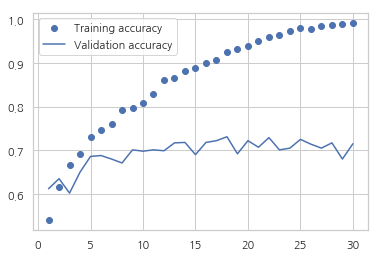

In [18]:
# plot with accuracy
%matplotlib inline

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label = "Training accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation accuracy")
plt.legend()
plt.show()

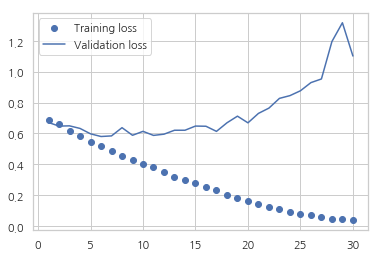

In [20]:
# plot with loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.legend()
plt.show()



In [21]:
# ImageDataGenerator를 사용하여 데이터 증식 설정
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode="nearest")

In [ ]:
# Dropout을 추가하여 CNN 모델 재선언
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

In [55]:
# batch size와 steps per epoch 설정에 의한 증식 사진 개수 실험
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

i = 0

for batch in datagen.flow_from_directory(directory=r"C:\Users\user\Desktop\generator_test", class_mode="binary", target_size=(150, 150), batch_size=3, save_to_dir=r"C:\Users\user\Desktop\agumented", save_prefix="hi"):
    
    i = i+1
    if i == 6 : 
        
        break

Found 9 images belonging to 2 classes.
